### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings ('ignore');

### Loading Dataset 

In [2]:
data = pd.read_csv('Amazon Sales data.csv')

In [3]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


### Data Preprocessing 

##### Converting object to Datatime

In [5]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [6]:
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

Extracting Year and Month for Yearly and Monthly Analysis of data

In [7]:
data.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,2013.230000,6.260000
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,2010.000000,1.000000
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2012.000000,4.000000
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,2013.000000,6.000000
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,2015.000000,9.250000
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,2017.000000,12.000000
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.088231,3.353334


In [8]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Year,Order Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,2011,7
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,7


###### Checking for null and duplicate values

In [9]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Order Year        0
Order Month       0
dtype: int64

In [10]:
data.duplicated().sum()

0

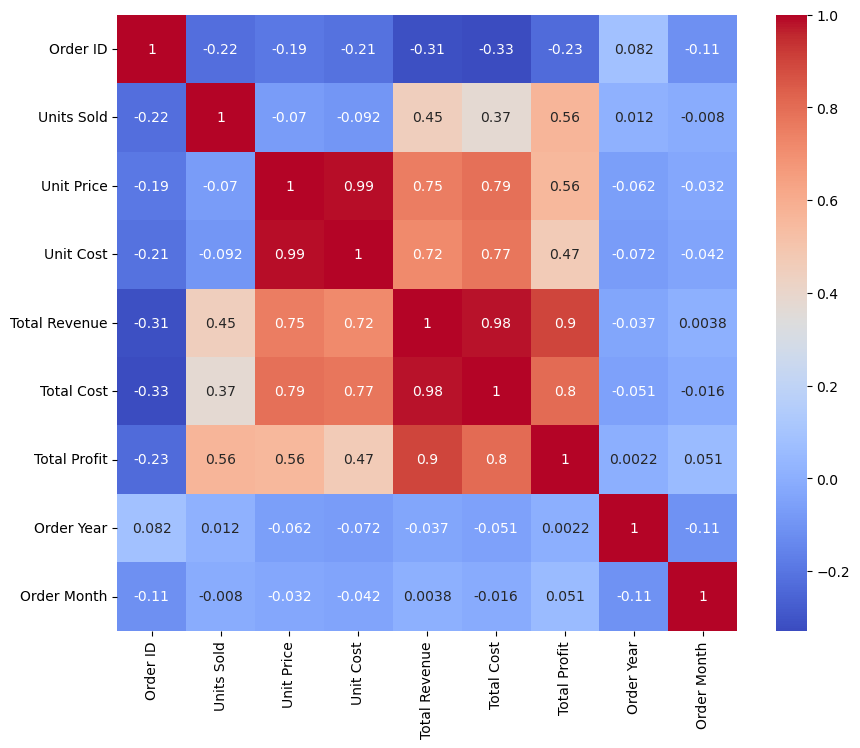

In [11]:
plt.figure(figsize = (10,8))
numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

##### Outliers Treatment 

In [12]:
  cols = ['Units Sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit']

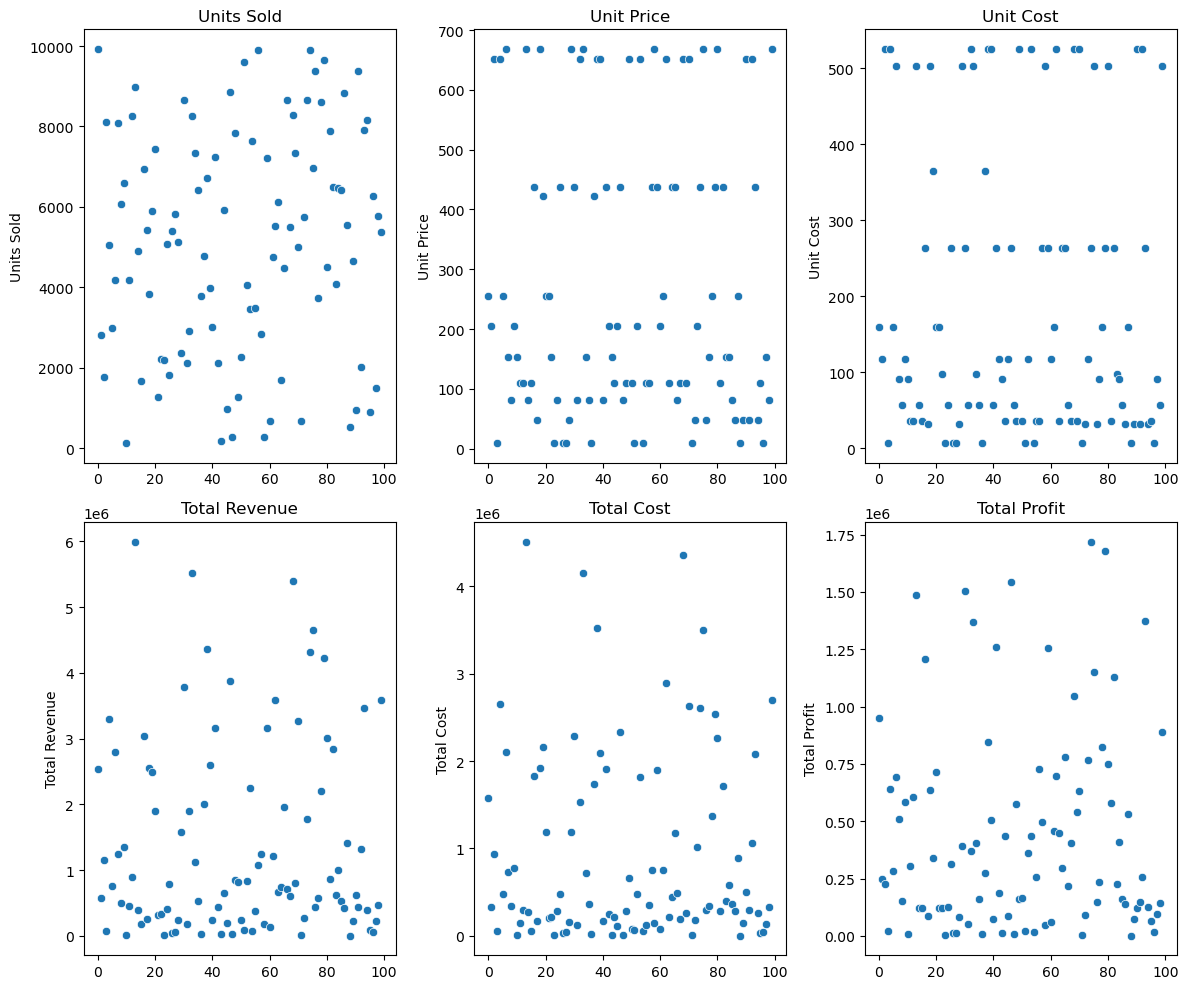

In [13]:

cols_index = 0
fig, ax = plt.subplots(2, 3, figsize=(12, 10)) 
    
for i in range(2):
        for j in range(3):
            if cols_index < len(cols):  
                sns.scatterplot(y=data[cols[cols_index]], x=data[cols[cols_index]].index, ax=ax[i, j])
                ax[i, j].set_title(cols[cols_index])  
                cols_index += 1
        
                
plt.tight_layout() 
plt.show()



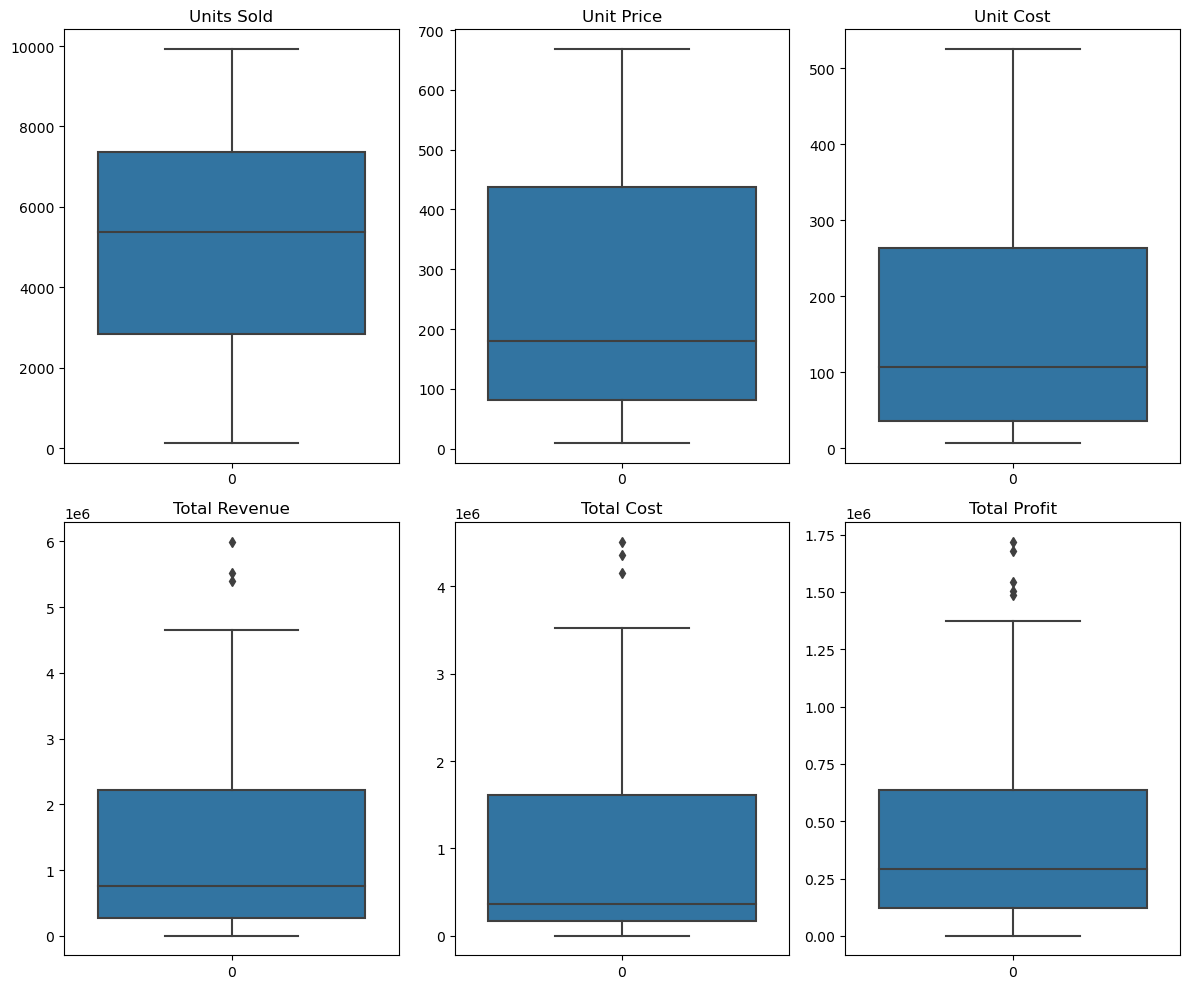

In [14]:
cols_index = 0
fig, ax = plt.subplots(2, 3, figsize=(12, 10)) 
    
for i in range(2):
        for j in range(3):
            if cols_index < len(cols):  
                sns.boxplot(data[cols[cols_index]], ax=ax[i, j])
                ax[i, j].set_title(cols[cols_index])  
                cols_index += 1
        
                
plt.tight_layout() 
plt.show()


In [15]:
def out(col):
    q3 = data[col].quantile(0.75)
    q1 = data[col].quantile(0.25)
    
    IQR = q3-q1
    
    upper_limit = q3 + 1.5 *IQR
    lower_limit = q1 - 1.5 * IQR
    
    data[col] = data[col].apply(lambda x: lower_limit if x < lower_limit else x)
    data[col] = data[col].apply(lambda x: upper_limit if x > upper_limit else x)
    
    

In [16]:
for i in cols:
    out(i)

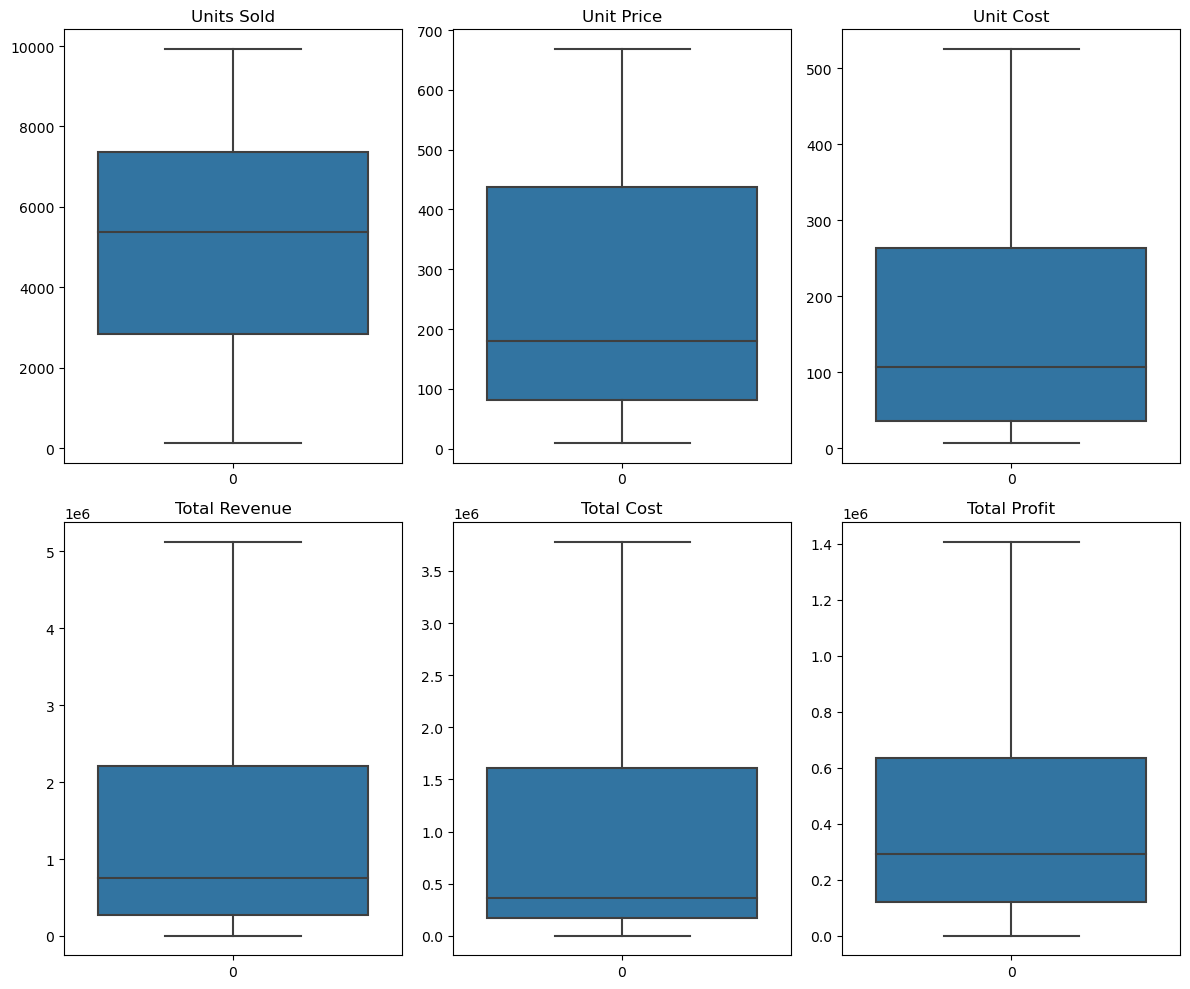

In [17]:
cols_index = 0
fig, ax = plt.subplots(2, 3, figsize=(12, 10)) 
    
for i in range(2):
        for j in range(3):
            if cols_index < len(cols):  
                sns.boxplot(data[cols[cols_index]], ax=ax[i, j])
                ax[i, j].set_title(cols[cols_index])  
                cols_index += 1
        
                
plt.tight_layout() 
plt.show()


### Analysis

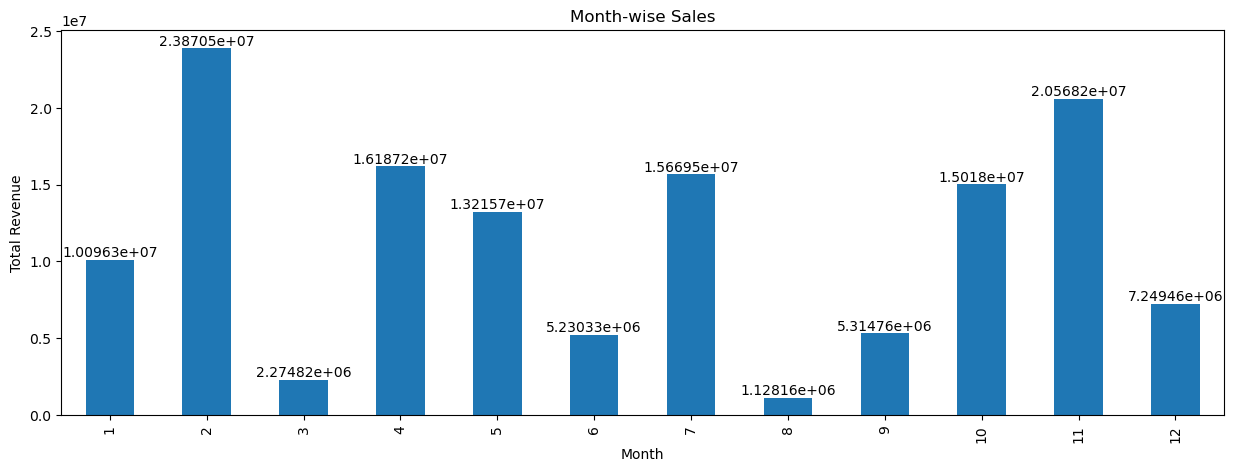

In [18]:
month = data.groupby(['Order Month'])['Total Revenue'].sum()

plt.figure(figsize = (15,5))
a = month.plot(kind='bar')
plt.title('Month-wise Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

for i in a.containers :
    a.bar_label(i)
    
plt.show()


#### From this we can say that February month has the highest orders till now as compared to other months where as August month has the lowest orders

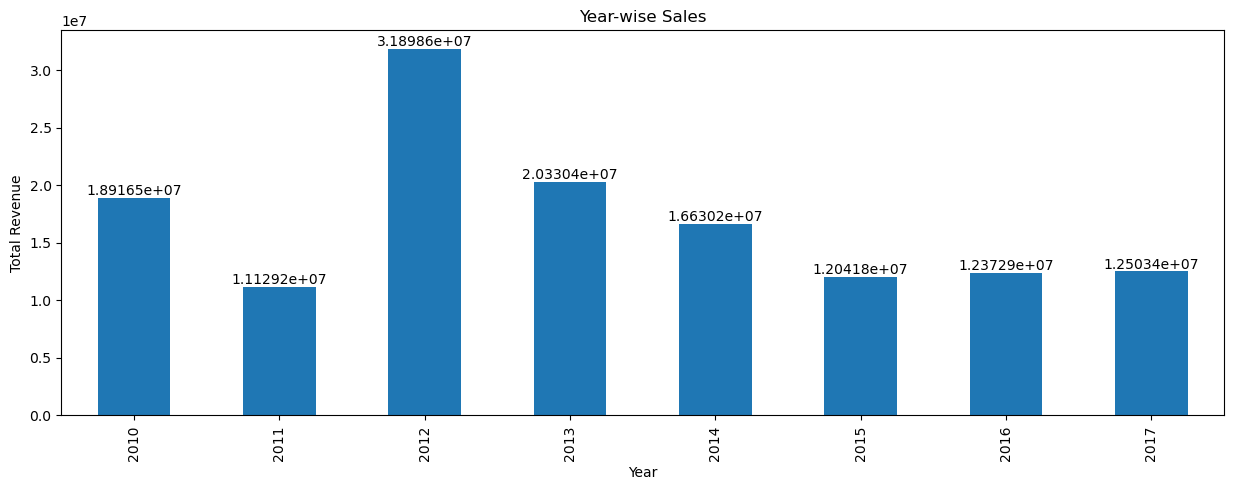

In [19]:
Year = data.groupby(['Order Year'])['Total Revenue'].sum()

plt.figure(figsize = (15,5))
b = Year.plot(kind='bar')
plt.title('Year-wise Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

for i in b.containers :
    b.bar_label(i)
    
plt.show()


#### From this we can say that  2012 has the highest orders till now as compared to other years where as August month has the 2011 orders

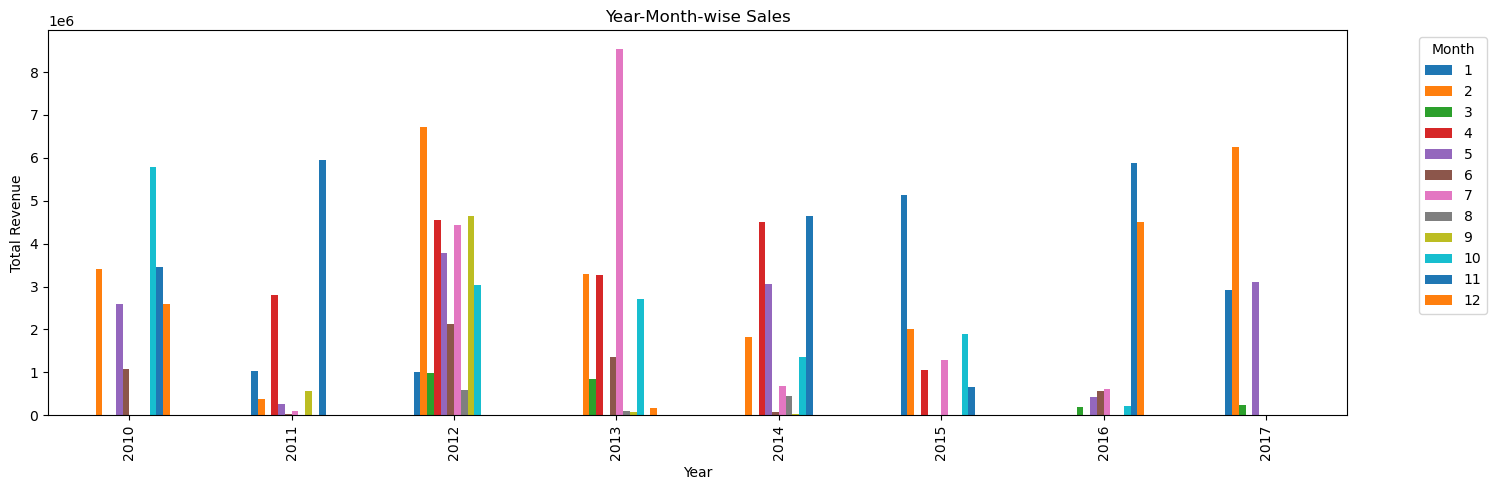

In [20]:
year_month_wise_sales = data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()

pivot_sales = year_month_wise_sales.pivot(index='Order Year', columns='Order Month', values='Total Revenue')


plt.figure(figsize=(15, 5))
pivot_sales.plot(kind='bar', ax=plt.gca())  # ax=plt.gca() ensures the plot is on the current axes
plt.title('Year-Month-wise Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### From this we can get in each year which month has the highest sale and which has the lowest sales 

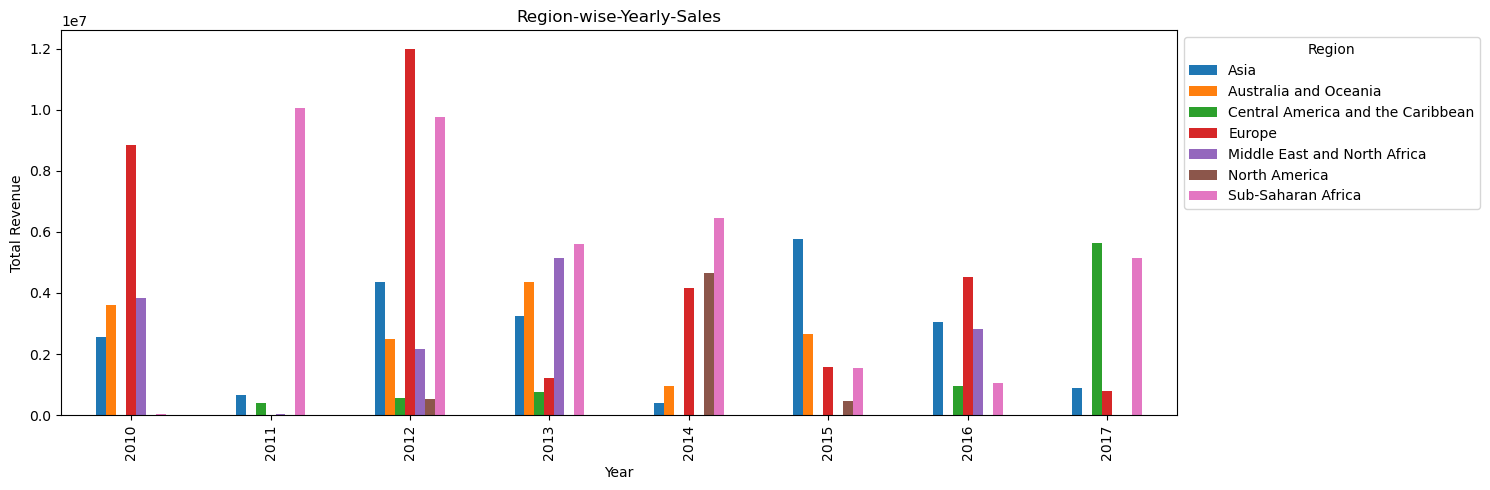

In [21]:
Region_wise_yearly_analysis = data.groupby(['Region', 'Order Year'])['Total Revenue'].sum()

# Convert the Series to a DataFrame using unstack
pivot_sales = Region_wise_yearly_analysis.unstack('Region')

# Plotting
plt.figure(figsize=(15, 5))
pivot_sales.plot(kind='bar', ax=plt.gca())
plt.title('Region-wise-Yearly-Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### From this we can conclude which region or sub-Continent has the Highest number of Orders in a given Year which has the lowest number of orders
###### eg : In 2012 Sales or Order placed were Highest in European Continent where as Lowest where for North American Continent or Region

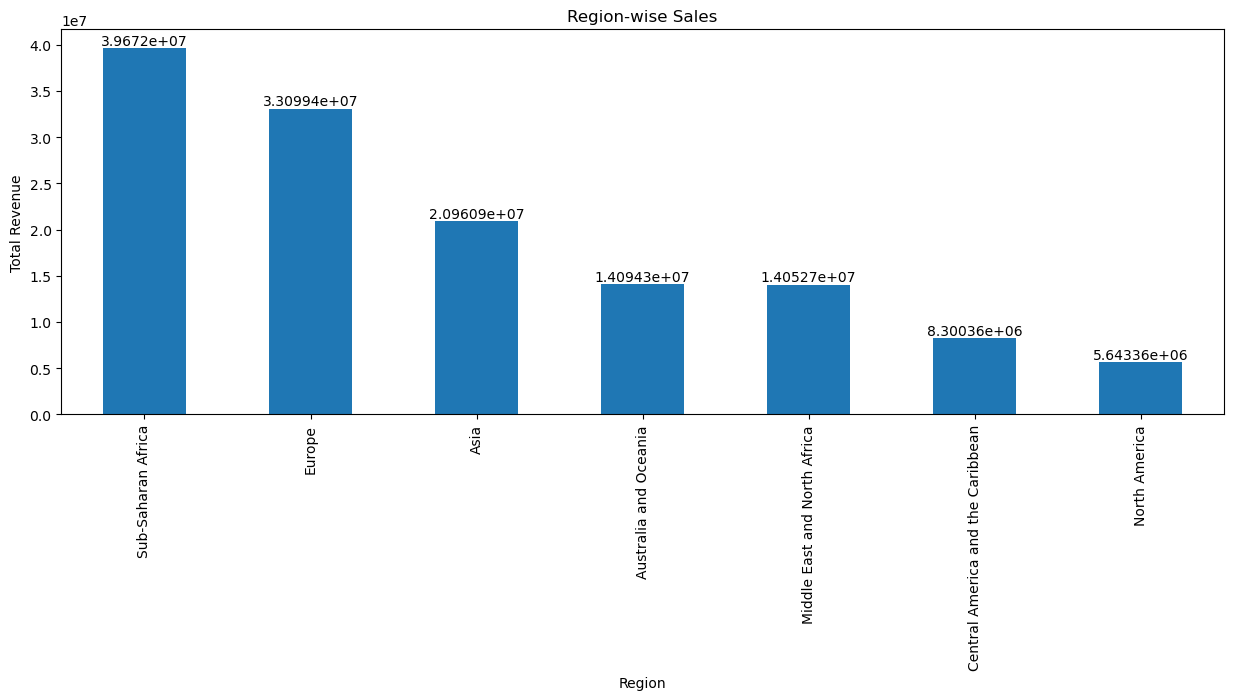

In [22]:
n = data.groupby(['Region'])['Total Revenue'].sum()
m = n.sort_values(ascending = False)
plt.figure(figsize = (15,5))
n = m.plot(kind='bar')
plt.title('Region-wise Sales')
plt.xlabel('Region')
plt.ylabel('Total Revenue')

for i in n.containers :
    n.bar_label(i)
    
plt.show()


#### By looking at this Bar graph we can say that Highest Sale or orders were recorded from Sub-Saharan Africa where as
#### lowest was recorded from North American Continent, reason for this can be clearly seen from below's plot

In [58]:
h = data.groupby(['Region'])['Sales Channel'].value_counts()


<Figure size 1000x600 with 0 Axes>

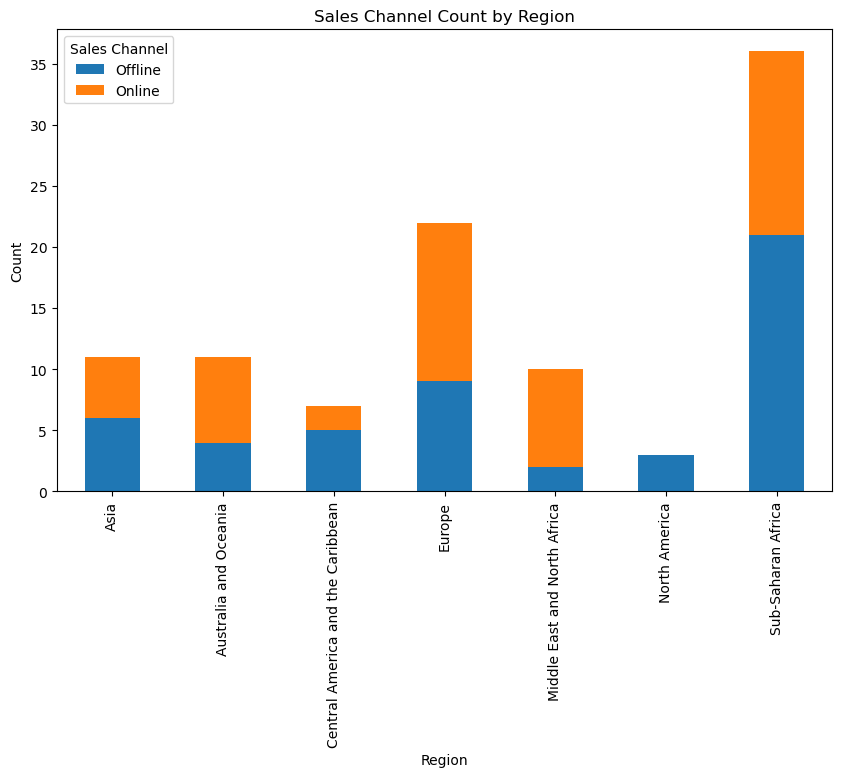

In [24]:
df_value_counts = h.reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
pivot_df = df_value_counts.pivot(index='Region', columns='Sales Channel', values='Count').fillna(0)

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Sales Channel Count by Region')
plt.legend(title='Sales Channel')
plt.show()


#### As you can see here there are no online order or online sales channel for North American Region and may be this be the reason for low orders in North American Continent where as European Continent has more number of online order as comapared to offline orders while Asian Continent shows almost equal number of order from both channels so may be in future online orders from Asian continent may Increase. South Saharan Africa has to work on online channel as their highest orders are from Offline channels.

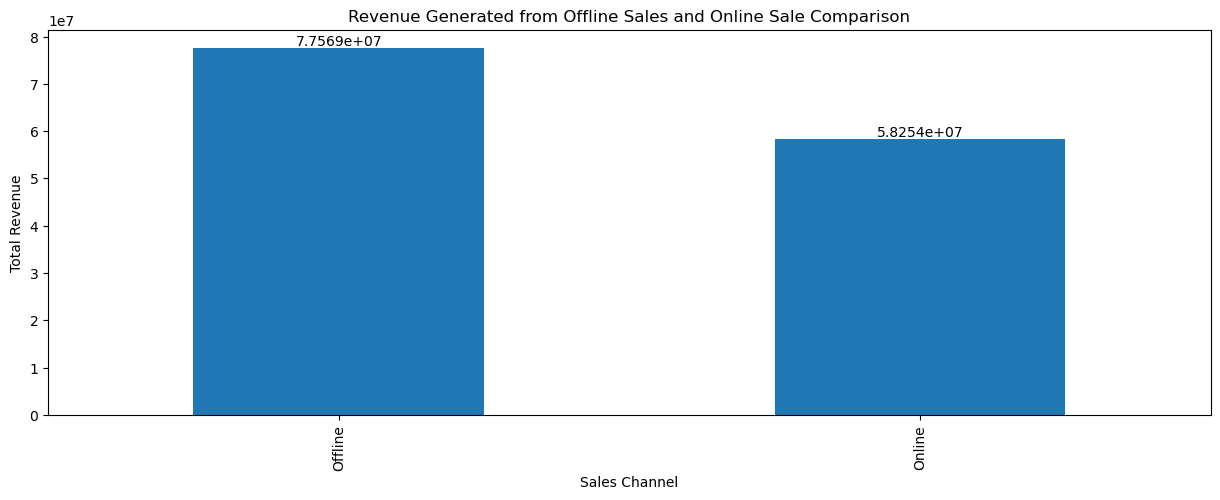

In [50]:
channel_sales = data.groupby(['Sales Channel'])['Total Revenue'].sum()
channel_sales_1 = channel_sales.sort_values(ascending = False)
plt.figure(figsize = (15,5))
channel_saless = channel_sales_1.plot(kind='bar')
plt.title('Revenue Generated from Offline Sales and Online Sale Comparison')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')

for i in channel_saless.containers :
    channel_saless.bar_label(i)
    
plt.show()


#### More Revenue is generated from Offline orders still online orders have generated sufficient amount of Revenue and may be in future it will surpass the Business from Offline Orders.

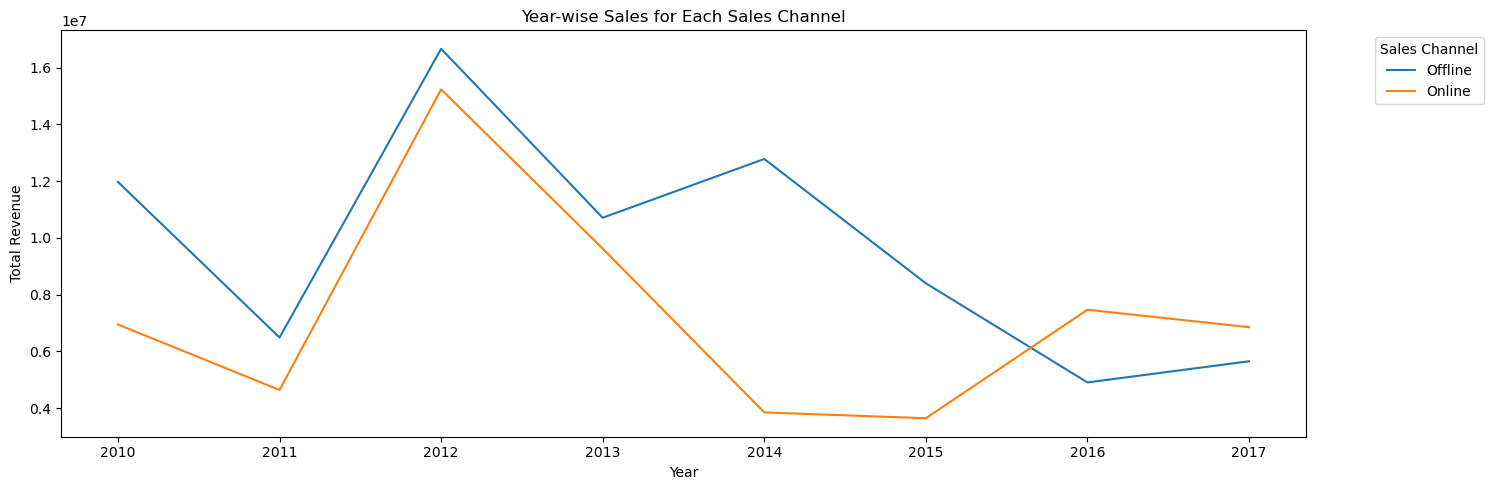

In [47]:
s = data.groupby(['Order Year','Sales Channel'])['Total Revenue'].sum().reset_index()
pivot_sales = s.pivot(index='Order Year', columns='Sales Channel', values='Total Revenue')

plt.figure(figsize=(15, 5))

# Plotting each sales channel as a line
for channel in pivot_sales.columns:
    pivot_sales[channel].plot(label=channel)

plt.title('Year-wise Sales for Each Sales Channel')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### As concluded from before graph this graph clearly justify the above conclusion that is with time we can see Revenue Generated from offline order is Continuously falling where as Online orders are collecting More number of Revenue

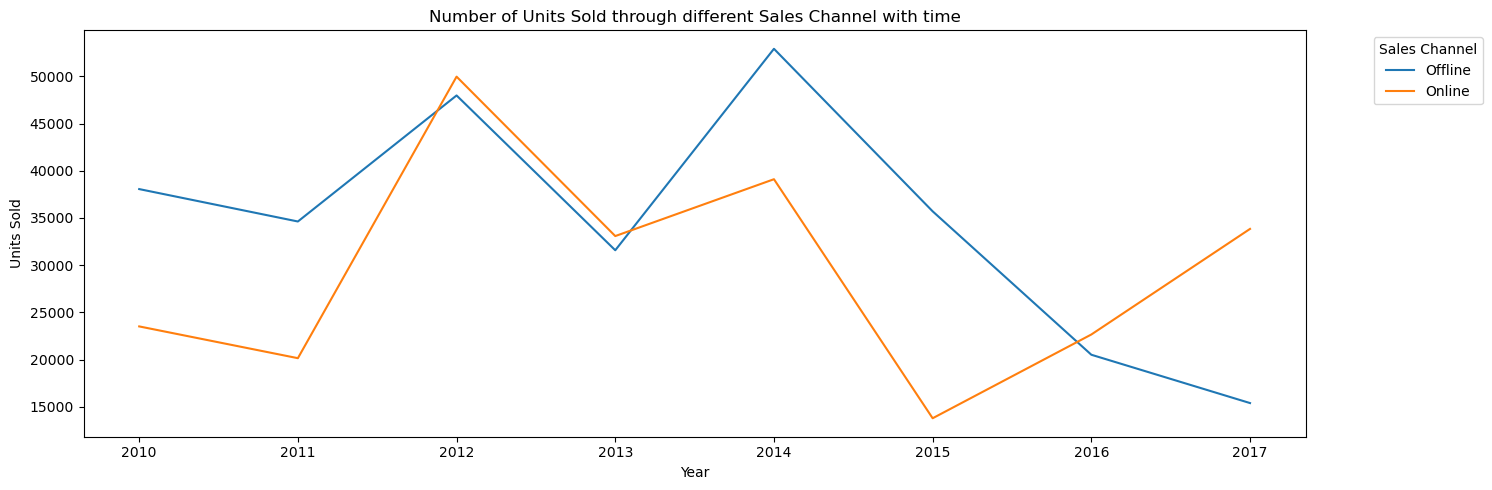

In [57]:
# Aggregate the data to remove duplicates
s = data.groupby([ 'Order Year', 'Sales Channel'])['Units Sold'].sum().reset_index()

# Pivot the data
pivot_sales = s.pivot_table(index='Order Year', columns='Sales Channel', values='Units Sold')

# Plotting
plt.figure(figsize=(15, 5))

# Plotting each sales channel as a line
for channel in pivot_sales.columns:
    pivot_sales[channel].plot(label=channel)

plt.title('Number of Units Sold through different Sales Channel with time')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.legend(title='Sales Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Reason Behind Falling Offline Revenue and Increasing Online Revenue is clearly seen fro here 

### Region WIse Analysis

In [27]:
asia_data = data[data['Region'] == 'Asia']
result = asia_data.groupby(['Region', 'Order Year'])['Total Revenue'].sum()
result

Region  Order Year
Asia    2010          2.559474e+06
        2011          6.525265e+05
        2012          4.368317e+06
        2013          3.262562e+06
        2014          4.005587e+05
        2015          5.775060e+06
        2016          3.039414e+06
        2017          9.029806e+05
Name: Total Revenue, dtype: float64

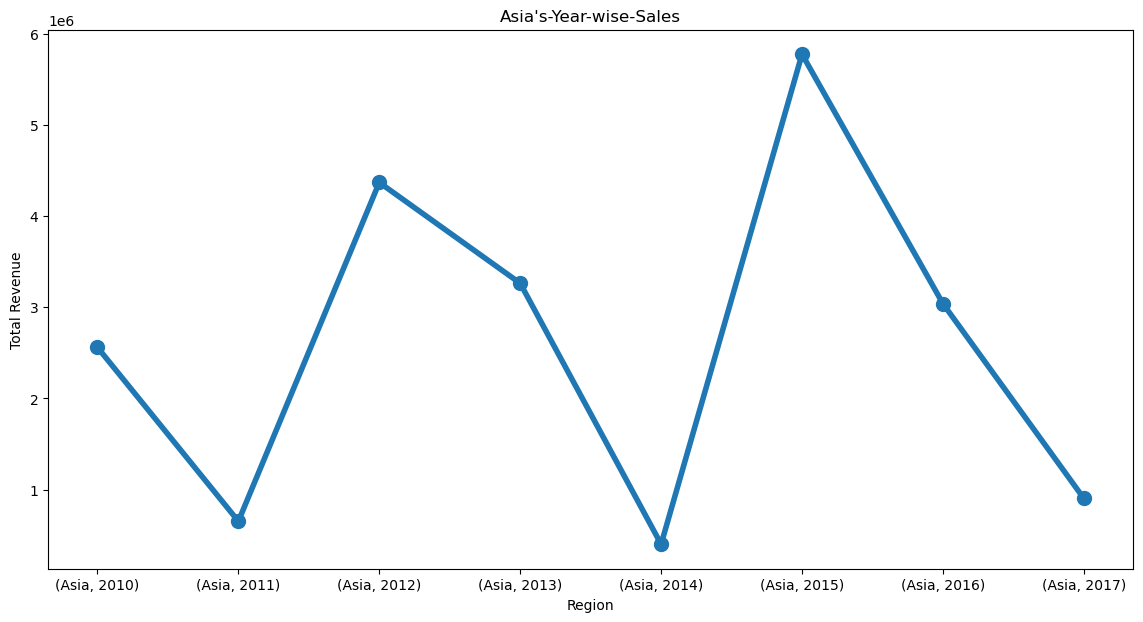

In [28]:
plt.figure(figsize = (14,7))
c = result.plot(kind='line', linewidth=4, linestyle='-', marker='o', markersize=10)
plt.title("Asia's-Year-wise-Sales")
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.xticks(rotation = 0)

    
plt.show()


#### In Asia overtime the sales of amazon is decreasing 

In [29]:
aus = data[data['Region'] == 'Australia and Oceania']
aus_result = aus.groupby(['Region', 'Order Year'])['Total Revenue'].sum()
aus_result

Region                 Order Year
Australia and Oceania  2010          3616072.40
                       2012          2492526.12
                       2013          4361016.20
                       2014           961309.65
                       2015          2663340.76
Name: Total Revenue, dtype: float64

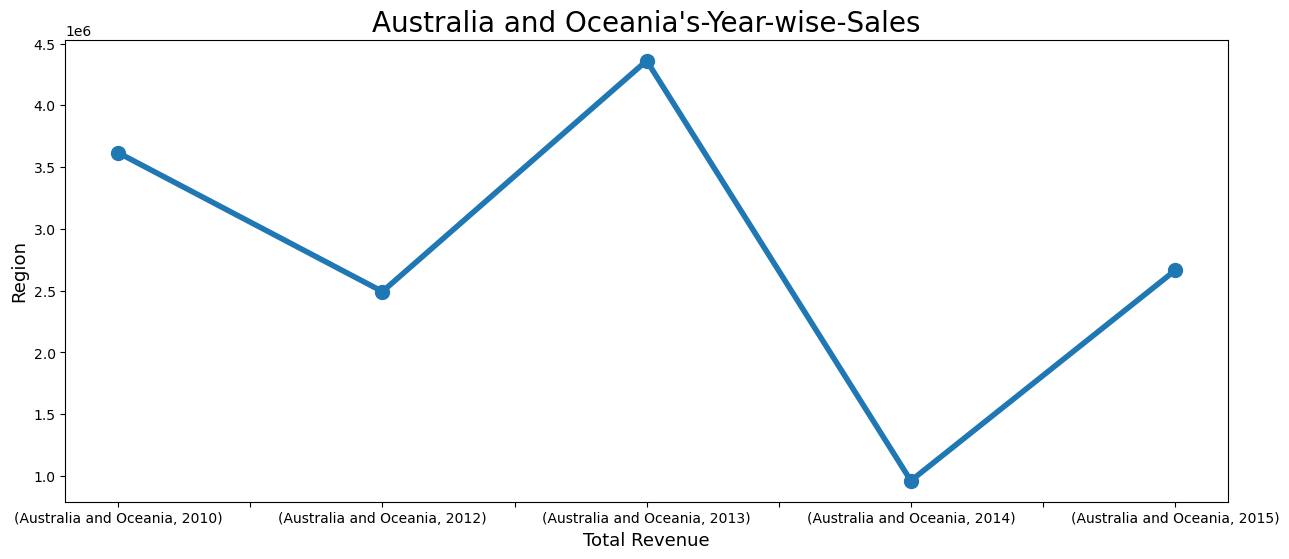

In [30]:
plt.figure(figsize = (15,6))
d = aus_result.plot(kind='line', linewidth=4, linestyle='-', marker='o', markersize=10)
plt.title("Australia and Oceania's-Year-wise-Sales",size = 20)
plt.xlabel('Total Revenue',size = 13)
plt.ylabel('Region',size = 13)
plt.xticks(rotation = 0 , size = 10)

    
plt.show()


#### In Australia it is not stable it increases and decreases 

In [31]:
Central_America_and_the_Caribbean_data = data[data['Region'] == 'Central America and the Caribbean']
result_Central_America_and_the_Caribbean_data = Central_America_and_the_Caribbean_data.groupby(['Region', 'Order Year'])['Total Revenue'].sum()
result_Central_America_and_the_Caribbean_data

Region                             Order Year
Central America and the Caribbean  2011          3.870022e+05
                                   2012          5.767828e+05
                                   2013          7.454260e+05
                                   2016          9.403119e+05
                                   2017          5.650837e+06
Name: Total Revenue, dtype: float64

Text(0.5, 0, 'Year')

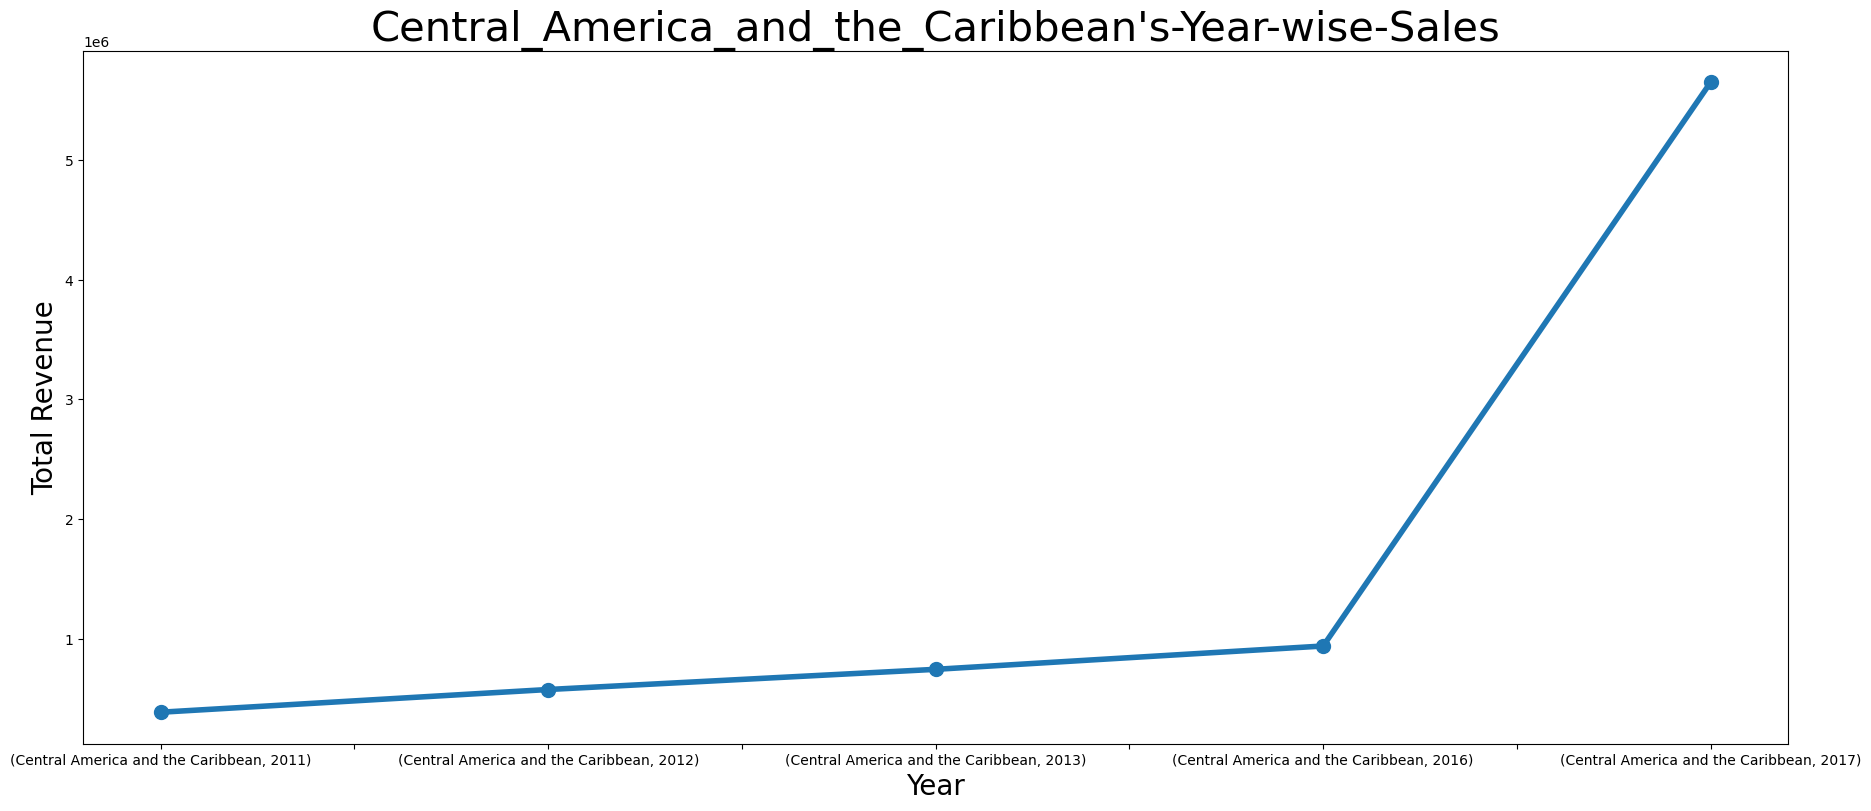

In [32]:
plt.figure(figsize=(22 ,9))
e = result_Central_America_and_the_Caribbean_data.plot(kind='line', linewidth=4, linestyle='-', marker='o', markersize=10)
plt.title("Central_America_and_the_Caribbean's-Year-wise-Sales" , size = 30)
plt.ylabel('Total Revenue' , size = 20)
plt.xlabel('Year' , size = 20)

#### where as in Central_America_and_the_Caribbean's Region it's showing Continuous growth which is a good sign 

In [33]:
Europe= data[data['Region'] == 'Europe']
result_Europe = Europe.groupby(['Region', 'Order Year'])['Total Revenue'].sum()
result_Europe

Region  Order Year
Europe  2010          8.855550e+06
        2012          1.199547e+07
        2013          1.212580e+06
        2014          4.160446e+06
        2015          1.569680e+06
        2016          4.512140e+06
        2017          7.935180e+05
Name: Total Revenue, dtype: float64

Text(0.5, 0, 'Year')

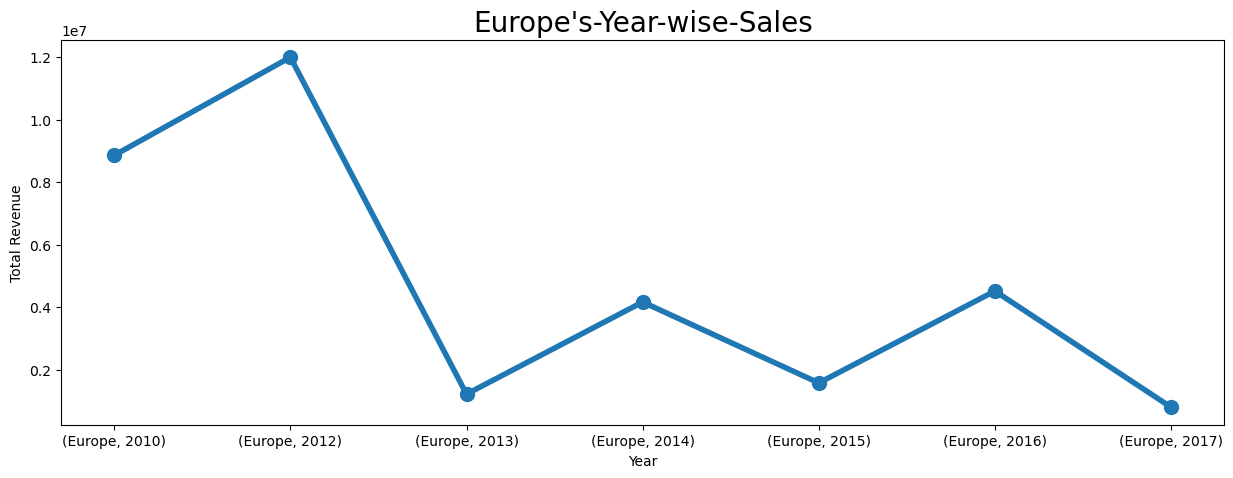

In [34]:
plt.figure(figsize=(15 ,5))
f = result_Europe.plot(kind='line', linewidth=4, linestyle='-', marker='o', markersize=10)
plt.title("Europe's-Year-wise-Sales" , size = 20)
plt.ylabel('Total Revenue')
plt.xlabel('Year')

#### Condition of Amazon in European Region is similar to Asian Region. Amazon needs to pay attention in this Region

In [35]:
Sub_Saharan_Africa= data[data['Region'] == 'Sub-Saharan Africa']
result_Sub_Saharan_Africa = Sub_Saharan_Africa.groupby(['Region', 'Order Year'])['Total Revenue'].sum()
result_Sub_Saharan_Africa

Region              Order Year
Sub-Saharan Africa  2010             54319.26
                    2011          10054332.68
                    2012           9758149.93
                    2013           5588322.86
                    2014           6460750.32
                    2015           1556088.36
                    2016           1044009.58
                    2017           5156058.44
Name: Total Revenue, dtype: float64

Text(0.5, 0, 'Year')

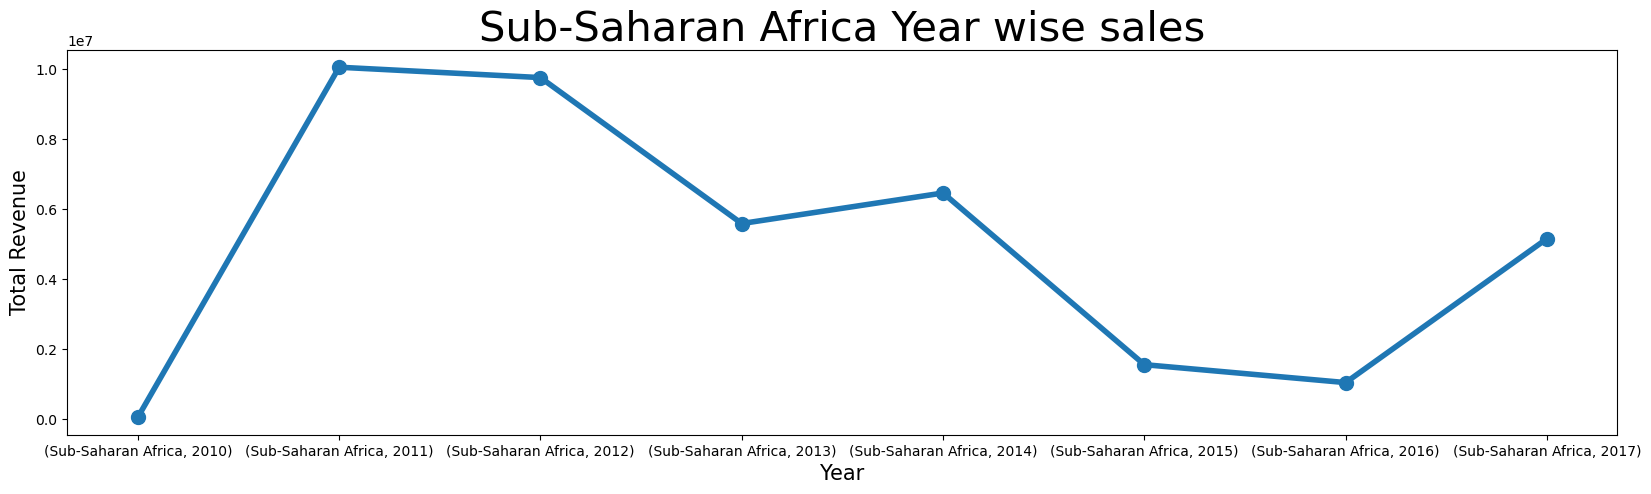

In [36]:
plt.figure(figsize=(20 ,5))
g= result_Sub_Saharan_Africa.plot(kind='line', linewidth=4, linestyle='-', marker='o', markersize=10)
plt.title("Sub-Saharan Africa Year wise sales" , size = 30)
plt.ylabel('Total Revenue' , size = 15)
plt.xlabel('Year' , size = 15)

#### In Sub Saharan African Region the sales intinially was very high but with time it's falling and also it's a region of highest Revenue for Amazon so they need to pay special attention in this region

In [37]:
Middle_East_and_North_Africa= data[data['Region'] == 'Middle East and North Africa']
result_Middle_East_and_North_Africa= Middle_East_and_North_Africa.groupby(['Region', 'Order Year'])['Total Revenue'].sum()
result_Middle_East_and_North_Africa

Region                        Order Year
Middle East and North Africa  2010          3831061.28
                              2011            35304.72
                              2012          2182529.19
                              2013          5160541.50
                              2015             6279.09
                              2016          2836990.80
Name: Total Revenue, dtype: float64

Text(0.5, 0, 'Year')

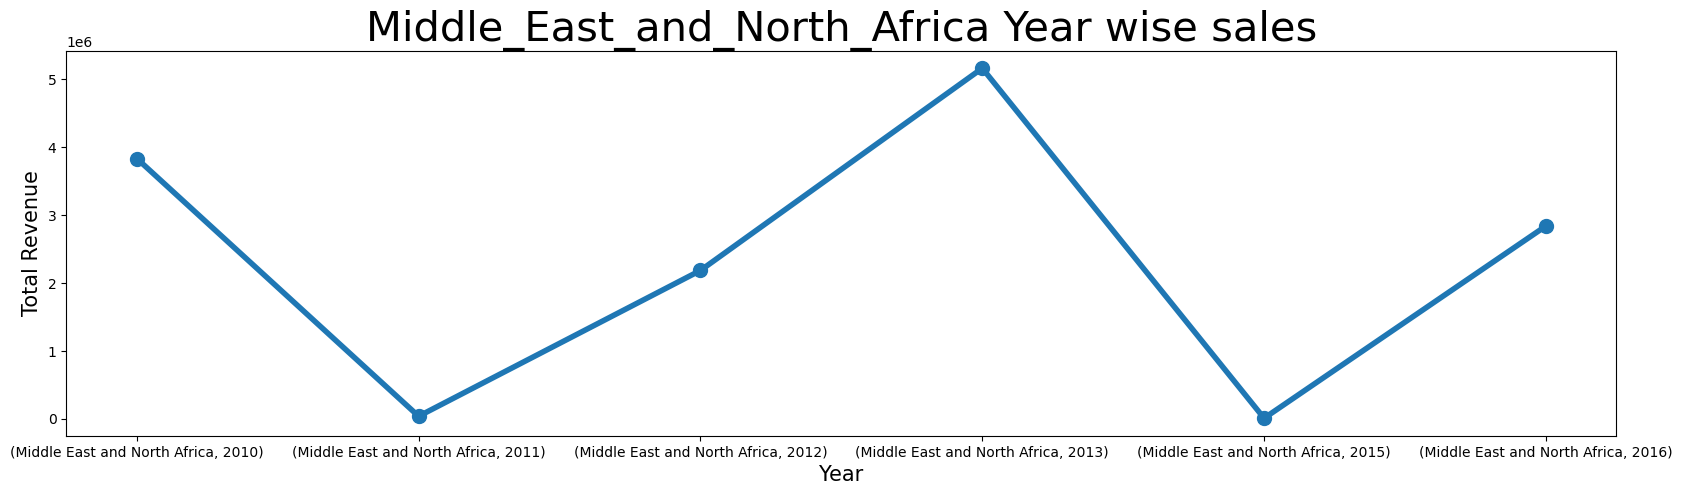

In [38]:
plt.figure(figsize=(20 ,5))
h = result_Middle_East_and_North_Africa.plot(kind='line', linewidth=4, linestyle='-', marker='o', markersize=10)
plt.title("Middle_East_and_North_Africa Year wise sales" , size = 30)
plt.ylabel('Total Revenue' , size = 15)
plt.xlabel('Year' , size = 15)

#### In this region the sales is not stable it's increasing sometime and decreases suddenly

In [39]:
North_America= data[data['Region'] == 'North America']
result_North_America = North_America.groupby(['Region', 'Order Year'])['Total Revenue'].sum()
result_North_America

Region         Order Year
North America  2012           524870.06
               2014          4647149.58
               2015           471336.91
Name: Total Revenue, dtype: float64

Text(0.5, 0, 'Year')

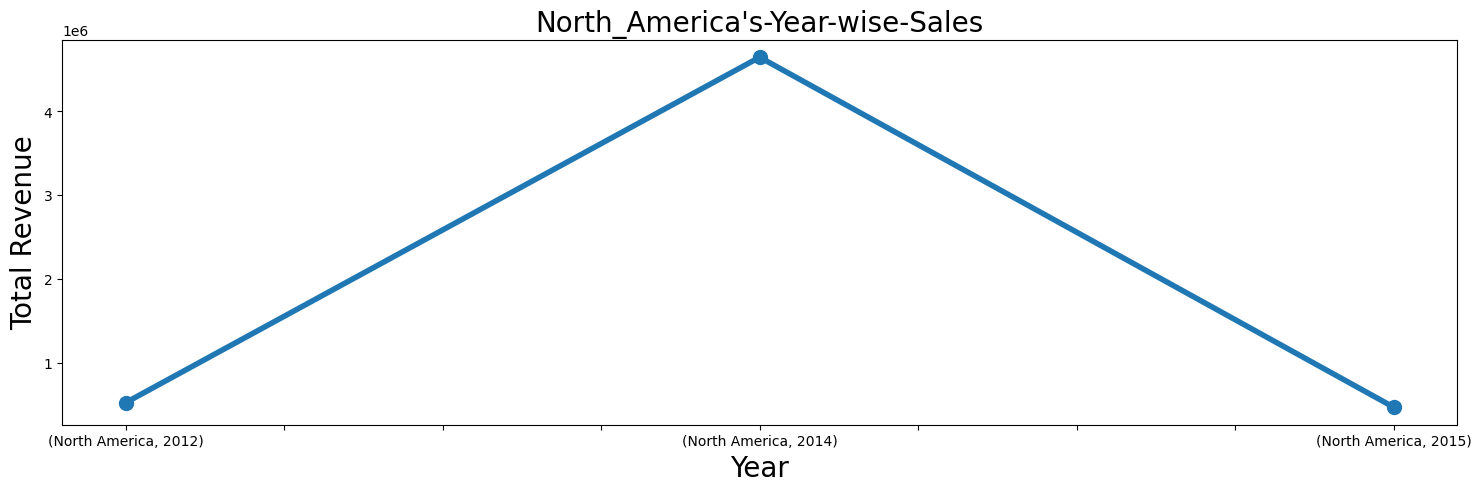

In [40]:
plt.figure(figsize=(18 ,5))
f = result_North_America.plot(kind='line', linewidth=4, linestyle='-', marker='o', markersize=10)
plt.title("North_America's-Year-wise-Sales" , size = 20)
plt.ylabel('Total Revenue',size = 20)
plt.xlabel('Year' ,size = 20)

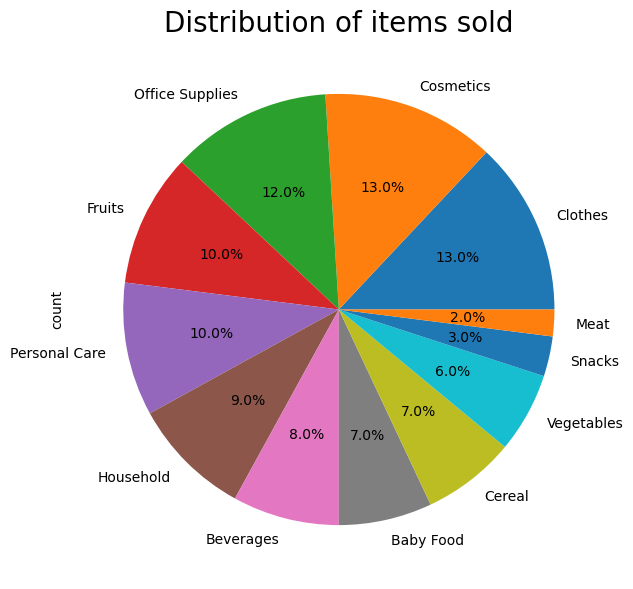

In [41]:
plt.figure(figsize=(40, 7))
g = data['Item Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Distribution of items sold", size=20)

plt.show()


#### From this pie chart we can see that, Cosmetic Product are the highest or mostly sold product while meat and snacks are least sold products 

In [42]:
cols = data['Item Type'].unique()

In [43]:
cols

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [44]:
results = []

In [45]:
for i in cols:
    a = data[data['Item Type'] == i][:1]
    result = a.groupby(['Item Type']).apply(lambda x: x['Unit Price'] - x['Unit Cost'])
    results.append( result)


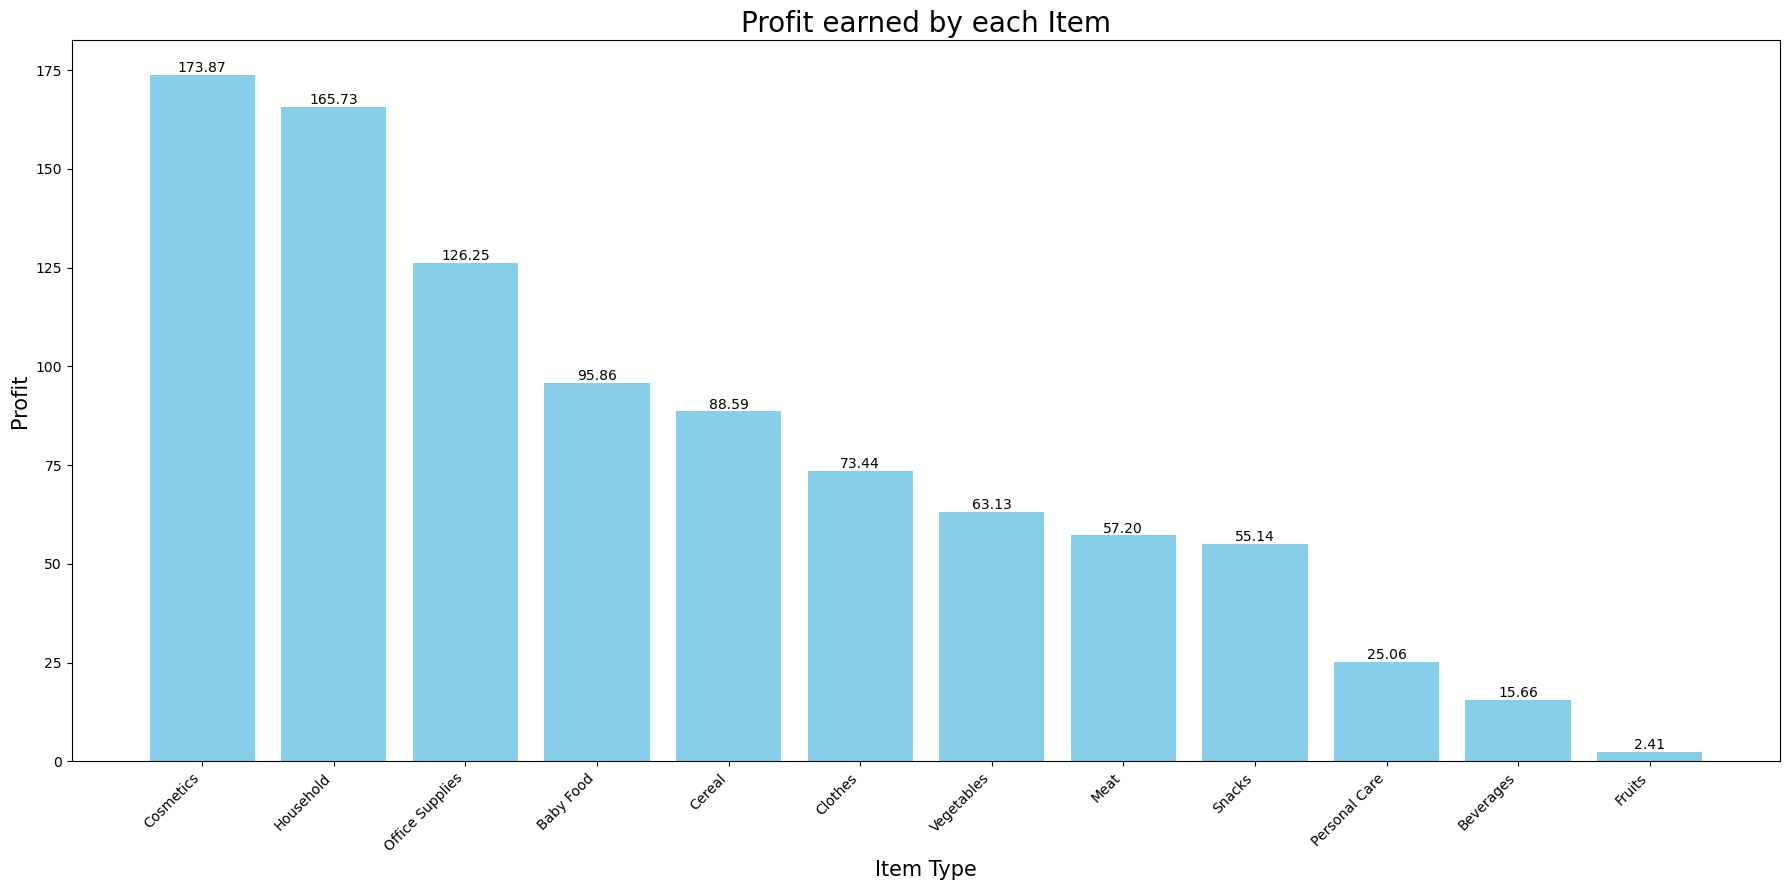

In [46]:
datas = {
    'Item Type': ['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household', 'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages', 'Meat', 'Snacks'],
    'Value': [95.86, 88.59, 126.25, 2.41, 165.73, 63.13, 25.06, 73.44, 173.87, 15.66, 57.2, 55.14]}

df = pd.DataFrame(datas)

sorted_df = df.sort_values(by='Value', ascending=False)


plt.figure(figsize=(18, 9))

z = plt.bar(sorted_df['Item Type'], sorted_df['Value'], color='skyblue')


plt.xlabel('Item Type' , size = 15)
plt.ylabel('Profit', size = 15)
plt.title('Profit earned by each Item' , size = 20)


plt.xticks(rotation=45, ha='right')

for bar in z.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', va='center',
                 size=10, xytext=(0, 5),
                 textcoords='offset points')

    
plt.tight_layout()  
plt.show()


#### The profit margin in Cosmetic products are highest whilw in fruits they are lowest. Also Comestic Product where the highest sold products this means highest company's profit share belong to this product